# Model Testing Notebook

Notebook for testing and gather statistics for the lifout paper

In [18]:

import liftout
from autoscript_sdb_microscope_client.structures import AdornedImage
from liftout.detection.detection import Detector

from liftout import utils
import matplotlib.pyplot as plt

import os


In [16]:
liftout_path = os.path.join(os.path.dirname(liftout.__file__))

print(liftout_path)

settings = utils.load_config(os.path.join(liftout_path, "protocol_liftout.yml"))

fname = os.path.join(liftout_path, "tools", "test_image.tif")
detector = Detector(weights_file=os.path.join(liftout_path, "model/models", settings["machine_learning"]["weights"]))

# load image from file
img = AdornedImage.load(fname)

# model inference
mask = detector.detection_model.model_inference(img.data)

c:\users\admin\github\autoliftout\liftout


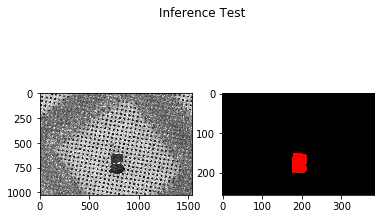

In [21]:
fig, ax = plt.subplots(1, 2)
fig.suptitle("Inference Test")

ax[0].imshow(img.data, cmap="gray")
ax[1].imshow(mask, cmap="gray")
plt.show()

In [30]:
print("GPU Statistics")
detector.detection_model.device = "cuda:0"
detector.detection_model.model.to("cuda:0")
%timeit mask = detector.detection_model.model_inference(img.data)

print("CPU Statistics")
detector.detection_model.device = "cpu"
detector.detection_model.model.to("cpu")
%timeit mask = detector.detection_model.model_inference(img.data)

GPU Statistics
25.3 ms ± 97.6 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
CPU Statistics
221 ms ± 2.28 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


232 ms ± 7.18 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
